In [2]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords



In [3]:

papers = pd.read_csv('output.csv')

print(papers.head())

# Remove punctuation
papers['paper_text_processed'] = \
papers['Text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
papers['paper_text_processed'].head()

print(papers['paper_text_processed'].head)

    FileName                                               Text
0     02.pdf  United Nations ||FCCC/ADP/2015/2 ||Distr.: Gen...
1    02a.pdf  United Nations ||FCCC/SBSTA/2015/2 ||Distr.: G...
2  02a01.pdf  United Nations ||FCCC/SBSTA/2015/2/Add.1 ||Dis...
3  02a02.pdf  United Nations ||FCCC/SBSTA/2015/2/Add.2 ||Dis...
4     03.pdf  United Nations ||FCCC/ADP/2015/3 ||Distr.: Gen...
<bound method NDFrame.head of 0     united nations ||fccc/adp/2015/2 ||distr: gene...
1     united nations ||fccc/sbsta/2015/2 ||distr: ge...
2     united nations ||fccc/sbsta/2015/2/add1 ||dist...
3     united nations ||fccc/sbsta/2015/2/add2 ||dist...
4     united nations ||fccc/adp/2015/3 ||distr: gene...
5     united nations ||fccc/adp/2014/4 ||distr: gene...
6     united nations ||fccc/adp/2015/4 ||distr: gene...
7     united nations ||fccc/adp/2015/5 ||distr: gene...
8     united nations ||fccc/cp/2015/10 ||distr: gene...
9     united nations ||fccc/sbi/2015/10 ||distr: gen...
10    united nations ||fcc

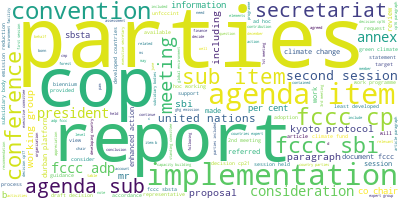

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud # Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()


In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend([])

def sent_to_words(sentences):
    for sentence in sentences:
    # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
             
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rdlb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['united', 'nations', 'fccc', 'adp', 'distr', 'general', 'april', 'original', 'english', 'ad', 'hoc', 'working', 'group', 'durban', 'platform', 'enhanced', 'action', 'report', 'ad', 'hoc', 'working', 'group', 'durban', 'platform', 'enhanced', 'action', 'eighth', 'part', 'second', 'session']


In [12]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 3), (2, 1), (3, 19), (4, 17), (5, 4), (6, 1), (7, 4), (8, 1), (9, 2), (10, 2), (11, 65), (12, 6), (13, 1), (14, 1), (15, 16), (16, 6), (17, 4), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 7), (28, 1), (29, 2)]


In [ ]:
from pprint import pprint# number of topics
num_topics = 10 # Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)# Print the Keyword in the 10 topics
text_topics = pprint(lda_model.print_topics())
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [26]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
    
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.018927 -0.007040       1        1  42.419202
0      0.020956 -0.007451       2        1  24.170260
7     -0.012767 -0.001461       3        1  23.469781
5     -0.000884  0.010822       4        1   7.620906
2     -0.005265  0.000291       5        1   1.076876
6      0.006013  0.006588       6        1   1.020883
4      0.002955  0.009256       7        1   0.163750
1     -0.001276  0.003185       8        1   0.053393
8      0.000131 -0.009075       9        1   0.002475
3      0.009064 -0.005116      10        1   0.002475, topic_info=               Term        Freq       Total Category  logprob  loglift
298         parties  868.000000  868.000000  Default  30.0000  30.0000
156            fccc  855.000000  855.000000  Default  29.0000  29.0000
97               cp  822.000000  822.000000  Default  28.0000  28.0000
371         session  721.000000  721.000000  Default  27.0000  27.0000
856             sbi  629.000000  629.000000  Default  26.0000  26.0000
..              ...         ...         ...      ...      ...      ...
63          climate    0.006536  344.706954  Topic10  -5.3674  -0.2664
184           group    0.006474  403.135538  Topic10  -5.3769  -0.4325
78       conference    0.005748  271.211046  Topic10  -5.4958  -0.1550
197  implementation    0.005524  372.832932  Topic10  -5.5355  -0.5129
126           draft    0.005452  280.987579  Topic10  -5.5486  -0.2433

[850 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3071      3  0.614422   abbreviation
2119      2  0.648738  accommodation
2121      1  0.379794    accordingly
2121      2  0.379794    accordingly
1039      1  0.263995        achieve
...     ...       ...            ...
1222      3  0.259081            www
2104      1  0.330724             xx
2104      2  0.132290             xx
2104      3  0.330724             xx
2104      4  0.132290             xx

[1718 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 8, 6, 3, 7, 5, 2, 9, 4])